### Wczytanie danych z preprocesingu

In [4]:
import pandas as pd
from pathlib import Path

data_dir = Path('data/processed')

X_train = pd.read_csv(data_dir / 'X_train_scaled.csv')
X_test = pd.read_csv(data_dir / 'X_test_scaled.csv')
y_train = pd.read_csv(data_dir / 'y_train.csv')
y_test = pd.read_csv(data_dir / 'y_test.csv')

print("Wczytano obrobione zbiory")

Wczytano obrobione zbiory


In [5]:
y_train.value_counts()

Binary_Label
0               1675959
1                143022
Name: count, dtype: int64

### Tworzenie modelu binarnego

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

print("Trenowanie modelu Random Forest...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model wytrenowany.\n")

Trenowanie modelu Random Forest...


/home/mateusz/Documents/Studia/MSIwC/venv/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model wytrenowany.



### Ocena modelu i macierz pomyłek

⭐ Wynik F1-Macro: 0.9982
---
Macierz Pomyłek (Confusion Matrix):
 [[418905     86]
 [   152  35603]]


<Figure size 800x600 with 0 Axes>

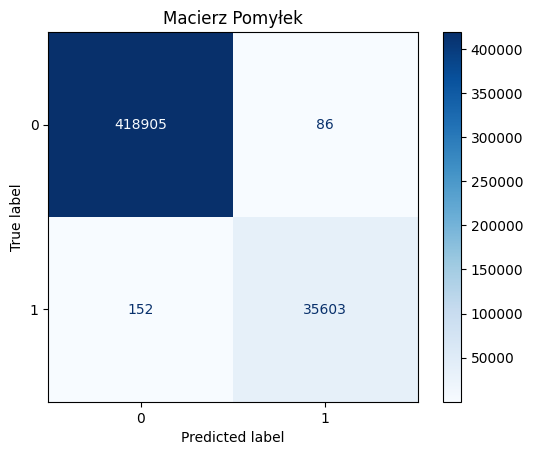

In [7]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f"⭐ Wynik F1-Macro: {f1_macro:.4f}")
print("---")

# B. Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted([0, 1])

print("Macierz Pomyłek (Confusion Matrix):\n", cm)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Macierz Pomyłek')
plt.show()